## Images of Each Class

In [46]:
#### Load in data ####

import os
import cv2
import numpy as np
import pandas as pd
from itertools import product
from tqdm import tqdm
from utils import load_images_by_domain, split_images

# Define paths
img_dir = "../OfficeCaltechDomainAdaptation/images"

# Load images by domain
data_by_domain = load_images_by_domain(
    img_dir=img_dir,
    target_size=(300, 300),  # Standardized size
    method="pad",           # Use padding to maintain aspect ratio
    seed=888                # Seed for reproducibility
)

# Split images: Combine amazon and caltech10 into train/val/test
train_data, val_data, test_data = split_images(
    data_by_domain=data_by_domain,
    train_domains=["amazon", "caltech10"],  # Combine these for training and validation
    test_domains=["dslr", "webcam"],                        # Use part of amazon and caltech10 for testing
    train_split=0.6,                        # 60% for training
    val_split=0.4,                          # 20% for validation
    use_train_for_test=False,                # Use part of train_domains for testing
    seed=888                                # Seed for reproducibility
)

# Summary of splits
print(f"Train images: {len(train_data['images'])}, Train labels: {len(train_data['labels'])}")
print(f"Validation images: {len(val_data['images'])}, Validation labels: {len(val_data['labels'])}")
print(f"Test images: {len(test_data['images'])}, Test labels: {len(test_data['labels'])}")

Train images: 1247, Train labels: 1247
Validation images: 832, Validation labels: 832
Test images: 452, Test labels: 452


In [47]:
from utils import standardize_image, load_split_images
train, val, test = load_split_images(img_dir=img_dir)

In [48]:
domain_caltech10 = np.where((train[0] == 'caltech10') & (train[1] == 'backpack'))[0]
domain_amazon = np.where((train[0] == 'amazon') & (train[1] == 'backpack'))[0]
domain_dslr = np.where((val[0] == 'dslr') & (val[1] == 'backpack'))[0]
domain_webcam = np.where((val[0] == 'webcam') & (val[1] == 'backpack'))[0]

In [49]:
np.random.seed(88888)
np.random.shuffle(domain_caltech10)
np.random.shuffle(domain_amazon)
np.random.shuffle(domain_dslr)
np.random.shuffle(domain_webcam)

In [50]:
domains = {
    'caltech10':[],
    'amazon':[],
    'dslr':[],
    'webcam':[]
}

for idx in domain_caltech10:
    try:
        domains['caltech10'].append(standardize_image(train[3][idx]))
    except:
        pass
    if len(domains['caltech10']) == 4:
        break
for idx in domain_amazon:
    try:
        domains['amazon'].append(standardize_image(train[3][idx]))
    except:
        pass
    if len(domains['amazon']) == 4:
        break
for idx in domain_dslr:
    try:
        domains['dslr'].append(standardize_image(val[3][idx]))
    except:
        pass
    if len(domains['dslr']) == 4:
        break
for idx in domain_webcam:
    try:
        domains['webcam'].append(standardize_image(val[3][idx]))
    except:
        pass
    if len(domains['webcam']) == 4:
        break

In [51]:
pd.DataFrame(train[0].tolist() + val[0].tolist() + test[0].tolist()).value_counts()

0        
caltech10    1123
amazon        958
webcam        295
dslr          157
Name: count, dtype: int64

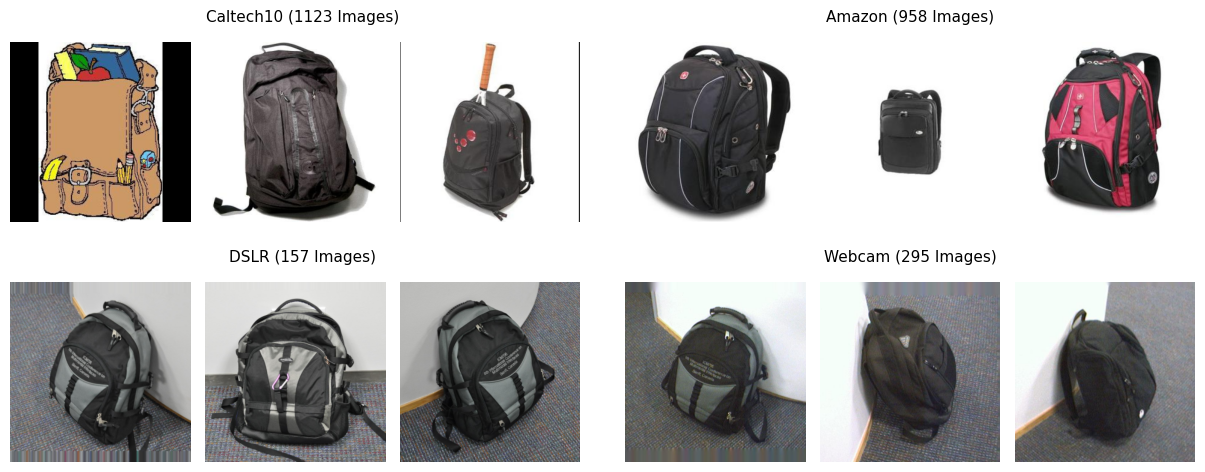

In [52]:
import matplotlib.patches as patches
def plot_img(ax, img, title=None):
    ax.imshow(img)
    # ax.set_title(title, fontsize=10)
    ax.axis('off')

    
# Create a grid with 2 rows: one for original images, one for GLCMs
fig, axes = plt.subplots(2, 6, figsize=(15, 6))

plot_img(axes[0, 0], domains['caltech10'][0], title='Caltech10')
plot_img(axes[0, 1], domains['caltech10'][1], title='Caltech10')
plot_img(axes[0, 2], domains['caltech10'][2], title='Caltech10')
plot_img(axes[0, 3], domains['amazon'][0], title='Amazon')
plot_img(axes[0, 4], domains['amazon'][1], title='Amazon')
plot_img(axes[0, 5], domains['amazon'][2], title='Amazon')
plot_img(axes[1, 0], domains['dslr'][0], title='DSLR')
plot_img(axes[1, 1], domains['dslr'][1], title='DSLR')
plot_img(axes[1, 2], domains['dslr'][2], title='DSLR')
plot_img(axes[1, 3], domains['webcam'][0], title='Webcam')
plot_img(axes[1, 4], domains['webcam'][1], title='Webcam')
plot_img(axes[1, 5], domains['webcam'][2], title='Webcam')

# Define custom spacing between columns 2 and 3
gap = 0.02  # This is the gap you want between columns 2 and 3

# Adjust the position of each subplot manually to control the spacing
# Columns 1 and 2 (keep them close together)
axes[0, 0].set_position([0.05, 0.5, 0.2, 0.3])  # Leftmost column
axes[0, 1].set_position([0.18, 0.5, 0.2, 0.3])  # Column 2, closer to column 1
axes[0, 2].set_position([0.31, 0.5, 0.2, 0.3])  # Column 2, closer to column 1

# Column 3 and 4 (keep them close together)
axes[0, 3].set_position([0.44 + gap, 0.5, 0.2, 0.3])  # Column 3, closer to column 2
axes[0, 4].set_position([0.57 + gap, 0.5, 0.2, 0.3])  # Column 4, closer to column 3
axes[0, 5].set_position([0.70 + gap, 0.5, 0.2, 0.3])  # Column 4, closer to column 3

# Columns 1 and 2, row 2 (keep them close together)
axes[1, 0].set_position([0.05, 0.1, 0.2, 0.3])  # Leftmost column
axes[1, 1].set_position([0.18, 0.1, 0.2, 0.3])  # Column 2, closer to column 1
axes[1, 2].set_position([0.31, 0.1, 0.2, 0.3])  # Column 2, closer to column 1

# Column 3 and 4, row 2 (keep them close together)
axes[1, 3].set_position([0.44 + gap, 0.1, 0.2, 0.3])  # Column 3, closer to column 2
axes[1, 4].set_position([0.57 + gap, 0.1, 0.2, 0.3])  # Column 4, closer to column 3
axes[1, 5].set_position([0.70 + gap, 0.1, 0.2, 0.3])  # Column 4, closer to column 3

fig.text(0.285, 0.83, 'Caltech10 (1123 Images)', ha='center', va='bottom', fontsize=11)
fig.text(0.69, 0.83, 'Amazon (958 Images)', ha='center', va='bottom', fontsize=11)
fig.text(0.285, 0.43, 'DSLR (157 Images)', ha='center', va='bottom', fontsize=11)
fig.text(0.69, 0.43, 'Webcam (295 Images)', ha='center', va='bottom', fontsize=11)

plt.show()

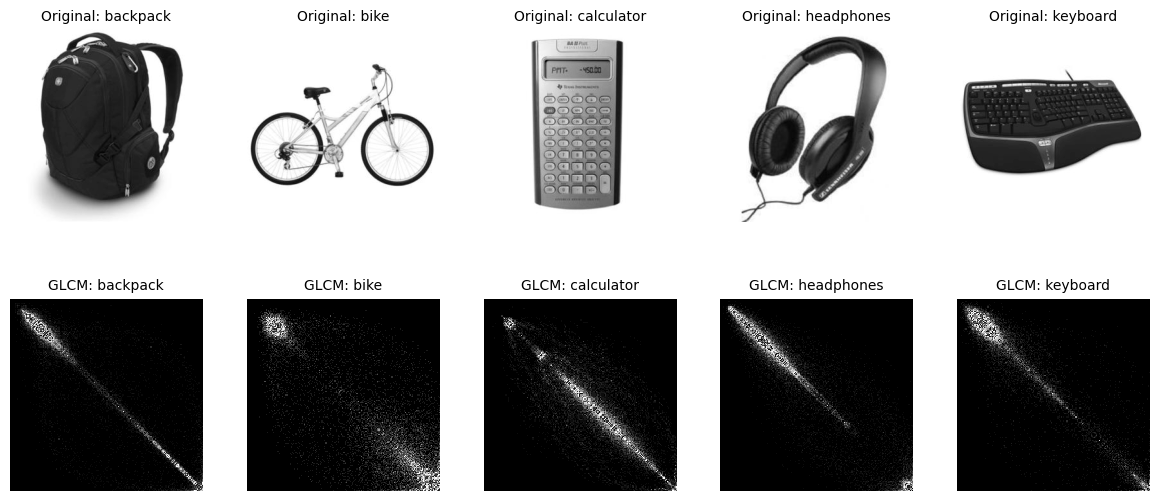

In [63]:
import cv2
import numpy as np
from skimage.exposure import equalize_hist
import matplotlib.pyplot as plt
from utils import load_images_by_domain, split_images, compute_glcm_features

from skimage.feature import graycomatrix


# Select categories and corresponding images
categories_to_select = ["backpack", "bike", "calculator", "headphones", "keyboard"]
selected_images = []
selected_categories = []

# Assuming data_by_domain["amazon"] is a tuple: (images, labels)
amazon_images, amazon_labels = data_by_domain["amazon"]  # Extract images and labels from the tuple

for category in categories_to_select:
    # Find the first image for each category in the Amazon dataset
    for image, label in zip(amazon_images, amazon_labels):
        if label == category:
            selected_images.append(image)
            selected_categories.append(category)
            break  # Move to the next category after finding the first match

# Compute GLCM for visualization
def compute_glcm_visualization(image, distance=1, angle=0, levels=256):
    """
    Compute GLCM for visualization.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(
        gray_image,
        distances=[distance],
        angles=[angle],
        levels=levels,
        symmetric=True,
        normed=True
    )
    # Aggregate across distances and angles
    glcm_aggregated = glcm[:, :, 0, 0]
    return glcm_aggregated

# Normalize GLCM for visualization
def normalize_glcm(glcm, clip_percentile=99):
    """
    Normalize the GLCM for visualization, applying thresholding and scaling.
    """
    max_value = np.percentile(glcm, clip_percentile)  # Top percentile of values
    if max_value == 0:  # Avoid division by zero
        max_value = 1
    glcm_normalized = (glcm / max_value * 255).astype(np.uint8)
    return glcm_normalized

# GLCM visualization function
def compute_and_visualize_glcm(image, distance=1, angle=0, levels=256, output_size=(300, 300)):
    """
    Compute and visualize GLCM for a given image with enhancements for better visualization.
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute GLCM
    glcm = compute_glcm_visualization(image, distance, angle, levels)

    # Normalize GLCM for visualization
    glcm_normalized = normalize_glcm(glcm)

    # Resize GLCM to match the desired resolution
    glcm_resized = cv2.resize(glcm_normalized, output_size, interpolation=cv2.INTER_NEAREST)

    return gray_image, glcm_resized

# Compute GLCMs for the selected images
original_images = []
glcm_images = []

for image in selected_images:
    original, glcm = compute_and_visualize_glcm(image, distance=1, angle=0, levels=256, output_size=(300, 300))
    original_images.append(original)
    glcm_images.append(glcm)

# Plot GLCM results
def plot_glcm_results(original_images, glcm_images, categories):
    """
    Plot original images in a single row and their corresponding GLCMs in another row with specific labels.
    """
    num_categories = len(categories)
    
    # Create a grid with 2 rows: one for original images, one for GLCMs
    fig, axes = plt.subplots(2, num_categories, figsize=(15, 6))
    
    # Plot original images in the top row
    for i, category in enumerate(categories):
        axes[0, i].imshow(original_images[i], cmap='gray')
        axes[0, i].set_title(f"Original: {category}", fontsize=10)  # Dynamic title
        axes[0, i].axis('off')

    # Plot GLCMs in the bottom row
    for i, category in enumerate(categories):
        axes[1, i].imshow(glcm_images[i], cmap='gray', interpolation='nearest')
        axes[1, i].set_title(f"GLCM: {category}", fontsize=10)  # Dynamic title
        axes[1, i].axis('off')
    
    # Adjust spacing between plots
    plt.subplots_adjust(wspace=0.1, hspace=0.4)  # Adjust spacing between rows and columns
    
    plt.show()

# Plot the GLCM results
plot_glcm_results(original_images, glcm_images, selected_categories)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load CSV files
file_paths = {
    "LBP": r"features/train_lbp_features.csv",
    "GLCM": r"features/train_glcm_features.csv",
    "ResNet": r"features/train_resnet_features.csv",
    "ORB BoVW": r"features/train_orb_bovw_features.csv",
    "RGB": r"features/train_rgb_features.csv",
}

datasets = {}

# Load datasets from CSV files
for method, path in file_paths.items():
    df = pd.read_csv(path)
    features = df.drop(columns=["label"]).values
    labels = df["label"].values
    # Add to the datasets dictionary
    datasets[method] = (features, labels)

# Function to preprocess features
def preprocess_features(features):
    # Replace infinity and NaN values
    features = np.nan_to_num(features, nan=0.0, posinf=1e6, neginf=-1e6)
    # Clip values to a reasonable range
    features = np.clip(features, -1e6, 1e6)
    return features

# Preprocess features for all datasets
for method in datasets:
    features, labels = datasets[method]
    datasets[method] = (preprocess_features(features), labels)

# Function to apply t-SNE
def apply_tsne(features):
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
    features_2d = tsne.fit_transform(features)
    return features_2d


c:\Users\rockhopper\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\rockhopper\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\rockhopper\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\rockhopper\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\rockhopper\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: Futur

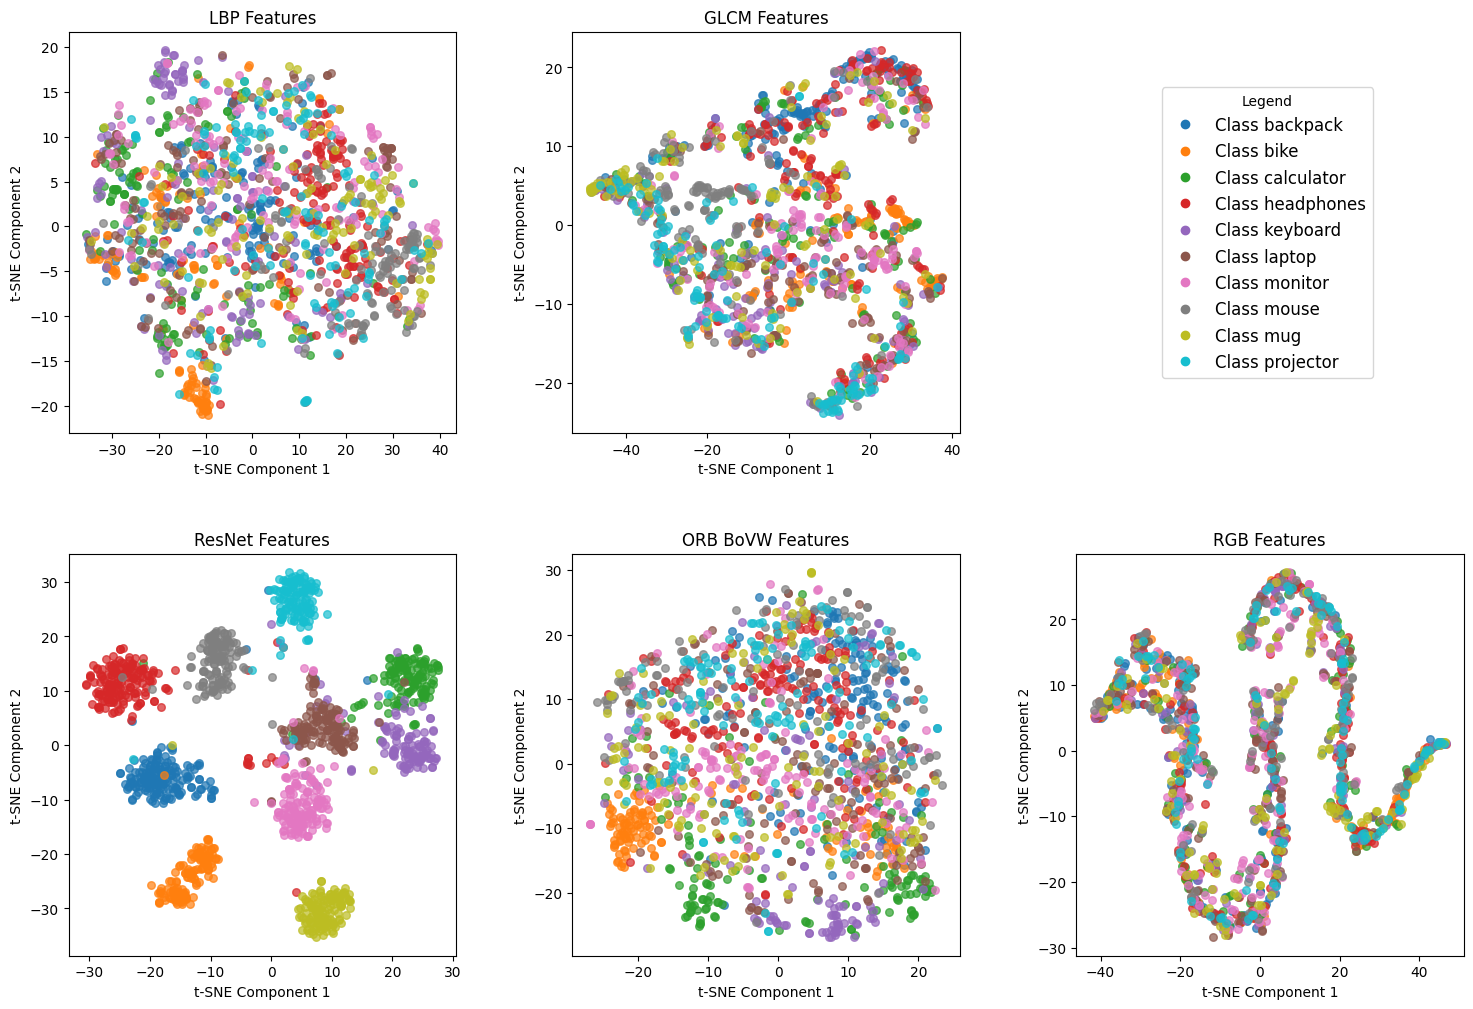

In [41]:
import matplotlib.gridspec as gridspec

# Create figure and gridspec for desired layout
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(2, 3, figure=fig)

# Place GLCM in the center of the top row
ax_top_left = fig.add_subplot(gs[0, 0])
ax_top_mid = fig.add_subplot(gs[0, 1])  # This will hold GLCM
ax_bottom_left = fig.add_subplot(gs[1, 0])
ax_bottom_mid = fig.add_subplot(gs[1, 1])
ax_bottom_right = fig.add_subplot(gs[1, 2])

axes = [ax_top_left, ax_top_mid, ax_bottom_left, ax_bottom_mid, ax_bottom_right]

# Assign each method to a subplot
methods_list = list(datasets.items())

# Store unique labels and colors for the legend
unique_labels = None
colors = None

for idx, (method, (features, labels)) in enumerate(methods_list):
    # Apply t-SNE
    features_2d = apply_tsne(features)
    
    ax = axes[idx]
    if unique_labels is None:
        unique_labels = np.unique(labels)
        colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
    
    for category_id, color in zip(unique_labels, colors):
        idxs = np.where(labels == category_id)
        ax.scatter(features_2d[idxs, 0], features_2d[idxs, 1], 
                   label=f"Class {category_id}", alpha=0.7, s=30, color=color)
    
    ax.set_title(f"{method} Features")
    ax.set_xlabel("t-SNE Component 1")
    ax.set_ylabel("t-SNE Component 2")

# Place the legend once, next to the top-mid subplot (GLCM)
handles = [plt.Line2D([0], [0], marker='o', color=c, label=f"Class {l}", linestyle='') 
           for l, c in zip(unique_labels, colors)]

ax_top_mid.legend(
    handles=handles,
    loc='center left', 
    bbox_to_anchor=(1.5, 0.5), 
    fontsize=12, 
    title="Legend"
)

# Adjust spacing
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()


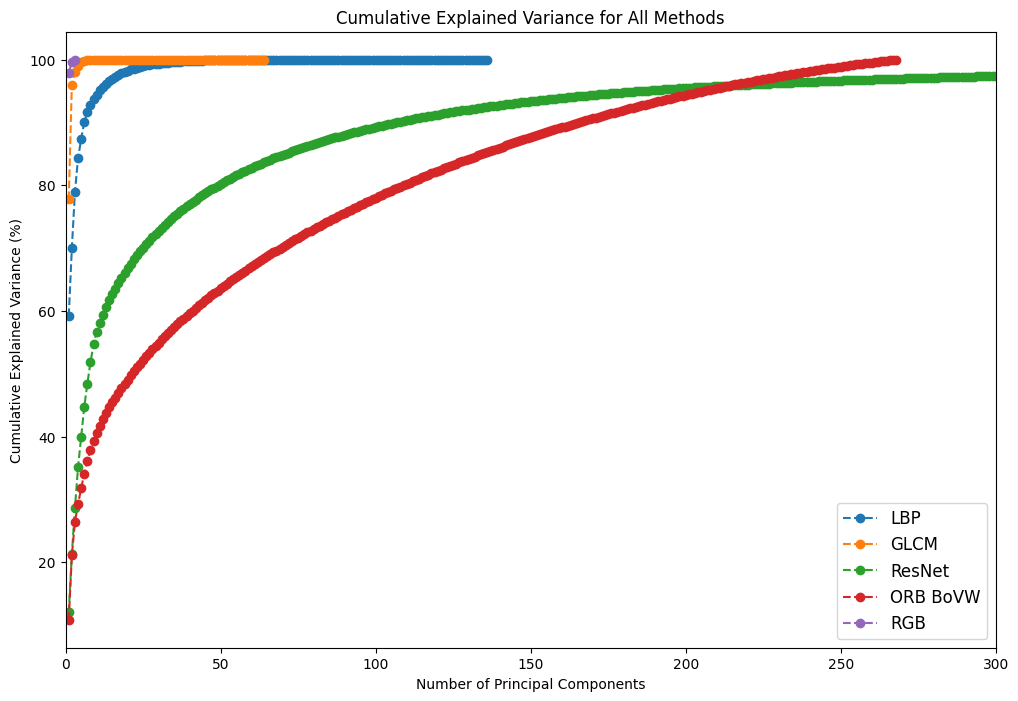

In [42]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Function to plot explained variance ratio for multiple methods on one plot
def plot_explained_variance_multiple(datasets):
    plt.figure(figsize=(12, 8))

    for method, (features, _) in datasets.items():
        pca = PCA()
        pca.fit(features)
        explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_) * 100
        
        plt.plot(
            range(1, len(explained_variance_ratio) + 1),
            explained_variance_ratio,
            marker='o',
            linestyle='--',
            label=f"{method}"
        )
    
    # Set x-axis limit to 300
    plt.xlim(0, 300)
    
    plt.title("Cumulative Explained Variance for All Methods")
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Explained Variance (%)")
    plt.legend(fontsize=12)  # Increased legend font size
    plt.show()

# Example usage: visualize PCA explained variance for all datasets
plot_explained_variance_multiple(datasets)


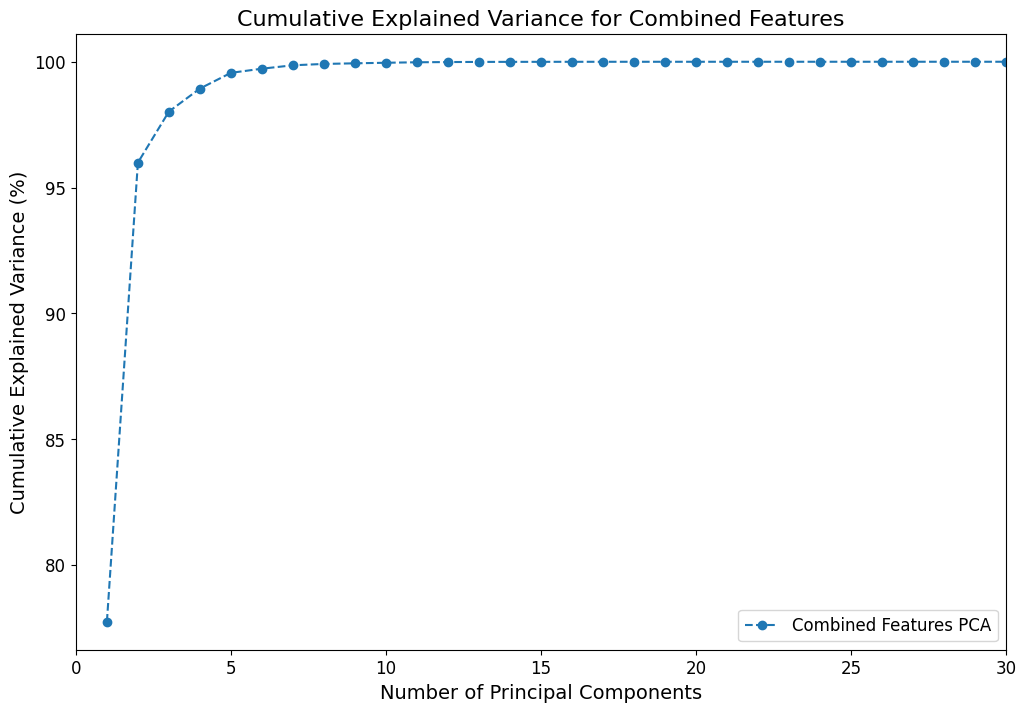

In [43]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Function to combine features (horizontally) and perform PCA
def combine_and_plot_explained_variance(datasets):
    # Horizontally concatenate all features for each dataset
    combined_features = np.hstack([features for features, _ in datasets.values()])
    
    # Perform PCA on the combined features
    pca = PCA()
    pca.fit(combined_features)
    explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_) * 100
    
    # Plot cumulative explained variance
    plt.figure(figsize=(12, 8))
    plt.plot(
        range(1, len(explained_variance_ratio) + 1),
        explained_variance_ratio,
        marker='o',
        linestyle='--',
        label="Combined Features PCA"
    )
    
    # Set x-axis limit to 30
    plt.xlim(0, 30)
    
    # Customize font sizes for axes, title, and legend
    plt.title("Cumulative Explained Variance for Combined Features", fontsize=16)
    plt.xlabel("Number of Principal Components", fontsize=14)
    plt.ylabel("Cumulative Explained Variance (%)", fontsize=14)
    plt.legend(fontsize=12)  # Increased legend font size
    plt.xticks(fontsize=12)  # Increase tick size on x-axis
    plt.yticks(fontsize=12)  # Increase tick size on y-axis
    plt.show()

# Example usage: visualize PCA explained variance for combined datasets
combine_and_plot_explained_variance(datasets)



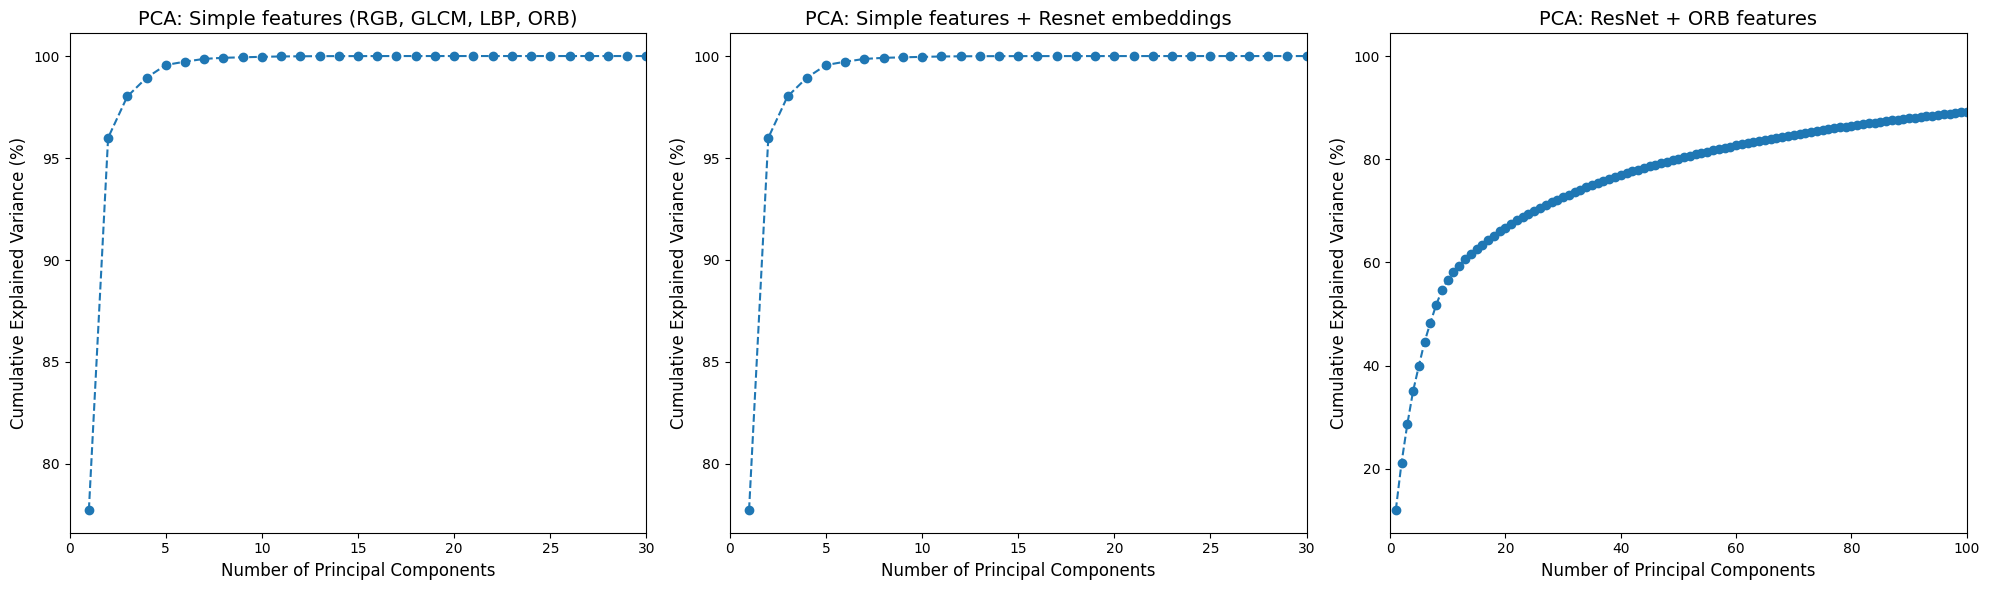

In [44]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load datasets from CSV files
file_paths = {
    "LBP": r"features/train_lbp_features.csv",
    "GLCM": r"features/train_glcm_features.csv",
    "ResNet": r"features/train_resnet_features.csv",
    "ORB BoVW": r"features/train_orb_bovw_features.csv",
    "RGB": r"features/train_rgb_features.csv",
}

# Load datasets, keeping only numeric columns
datasets = {}
for key, path in file_paths.items():
    df = pd.read_csv(path)
    numeric_df = df.select_dtypes(include=[np.number])  # Keep only numeric columns
    datasets[key] = numeric_df.values

# Function to perform PCA and plot cumulative explained variance
def plot_pca_explained_variance(feature_sets, title, ax, xlim=30):
    # Horizontally concatenate features
    combined_features = np.hstack(feature_sets)
    
    # Perform PCA
    pca = PCA()
    pca.fit(combined_features)
    explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_) * 100
    
    # Plot cumulative explained variance
    ax.plot(
        range(1, len(explained_variance_ratio) + 1),
        explained_variance_ratio,
        marker='o',
        linestyle='--'
    )
    ax.set_xlim(0, xlim)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Number of Principal Components", fontsize=12)
    ax.set_ylabel("Cumulative Explained Variance (%)", fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

# Extract features from datasets
lbp_features = datasets["LBP"]
glcm_features = datasets["GLCM"]
resnet_features = datasets["ResNet"]
orb_features = datasets["ORB BoVW"]
rgb_features = datasets["RGB"]

# Create the subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# 1. PCA with RGB + GLCM + LBP + ORB
plot_pca_explained_variance(
    feature_sets=[rgb_features, glcm_features, lbp_features, orb_features],
    title="PCA: Simple features (RGB, GLCM, LBP, ORB)",
    ax=axs[0]
)

# 2. PCA with RGB + GLCM + LBP + ORB + ResNet
plot_pca_explained_variance(
    feature_sets=[rgb_features, glcm_features, lbp_features, orb_features, resnet_features],
    title="PCA: Simple features + Resnet embeddings",
    ax=axs[1]
)

# 3. PCA with ResNet + ORB (increase x-axis limit to 100)
plot_pca_explained_variance(
    feature_sets=[resnet_features, orb_features],
    title="PCA: ResNet + ORB features",
    ax=axs[2],
    xlim=100  # Increased x-axis limit
)

# Adjust spacing and show the plots
plt.tight_layout()
plt.show()


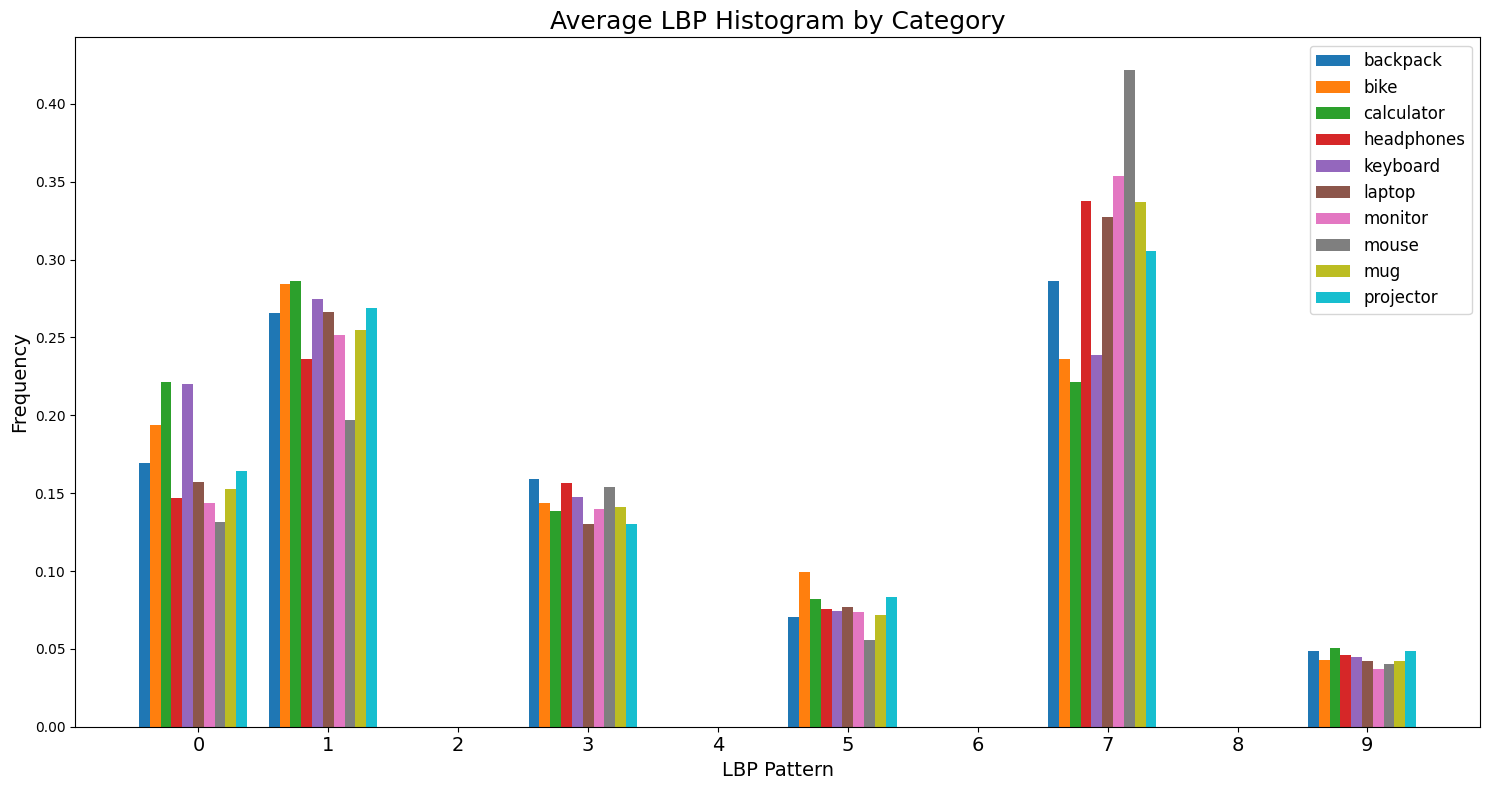

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split

# Parameters for rotation-invariant LBP
P = 8  # Number of circularly symmetric neighbor set points
R = 4  # Radius of circle

def extract_lbp_features(image, P=8, R=1):
    """
    Extract rotation-invariant LBP features from an image.
    Args:
        image (np.array): Grayscale image
        P (int): Number of circularly symmetric neighbor set points
        R (int): Radius of circle

    Returns:
        lbp_hist (np.array): Flattened rotation-invariant LBP histogram
    """
    # Compute rotation-invariant LBP
    lbp = local_binary_pattern(image, P, R, method="ror")
    
    # Compute LBP histogram
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    
    # Normalize the histogram
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)
    
    return lbp_hist

# Directory containing categories (update to the correct path)
amazon_dir = "../OfficeCaltechDomainAdaptation/images/amazon"

# Initialize dictionaries to store features and labels
lbp_features_by_category = {}
labels_by_category = {}

# Loop through categories and extract LBP features
for category in os.listdir(amazon_dir):
    category_path = os.path.join(amazon_dir, category)
    if os.path.isdir(category_path):
        lbp_features_by_category[category] = []
        labels_by_category[category] = []
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            # Read image in grayscale
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                lbp_hist = extract_lbp_features(image, P, R)
                lbp_features_by_category[category].append(lbp_hist)
                labels_by_category[category].append(category)

# Aggregate LBP features by category
patterns = np.arange(P + 2)
categories = list(lbp_features_by_category.keys())
avg_hist_by_category = [np.mean(lbp_features_by_category[cat], axis=0) for cat in categories]

# Plot the average LBP histograms with separation
fig, ax = plt.subplots(figsize=(15, 8))
bar_width = 0.1
index = np.arange(len(patterns))

# Introduce separation between bins (space between patterns)
bin_separation = 0.2
start_position = index * (1 + bin_separation)  # Add separation to each bin position

for i, (category, avg_hist) in enumerate(zip(categories, avg_hist_by_category)):
    ax.bar(start_position + i * bar_width, avg_hist, bar_width, label=category)

# Increase font sizes
title_fontsize = 18
label_fontsize = 14
legend_fontsize = 12

ax.set_title("Average LBP Histogram by Category", fontsize=title_fontsize)
ax.set_xlabel("LBP Pattern", fontsize=label_fontsize)
ax.set_ylabel("Frequency", fontsize=label_fontsize)
ax.set_xticks(start_position + bar_width * len(categories) / 2)
ax.set_xticklabels(patterns, fontsize=label_fontsize)
ax.legend(loc="upper right", fontsize=legend_fontsize)

plt.tight_layout()
plt.show()

